<a href="https://colab.research.google.com/github/awaaat/Machine_learning-Deep_learning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#We are going to perform the neccessary ML Steps, including data preprocessing, building a model, fitting it, making predictions with it, and evaluating it. Lastly, saving it


In [193]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [194]:
torch.__version__

'2.1.0+cu121'

#Data Preparation and loading
a)we start with a regression model with known data



In [195]:
#1Step 1: Create known variables
bias = 0.3
weight = 0.7
#create
start = 0
end = 1
step = 0.02
#Recap
#The Linear regression formula is y = a + bX. In this case, bias  = a, and weight = b
X = torch.arange(start, end, step).unsqueeze(dim = 1)
#y = a + bX
y = bias + weight * X


view = (X[:10], y[:10], len(X), len(y))
print(view)

(tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]), tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]]), 50, 50)


#Splitting data into traing and test sets

#Splitting data into training set and testset

In [196]:
#1create a train/test split

#we take 80% of x as :
train_split = int(0.8*len(X)) #This translates to 40 samples of X

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
print(len(X_train), len(y_train), len(X_test), len(y_test))

40 40 10 10


#Wait a minute... How might we best visualize out data? Visualize, visualize,, visualize


In [197]:
print(X_train, y_train)

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [

#Let us Visualize, visualize, visualize (""Motto"")

In [198]:
import matplotlib.pyplot as plt


def plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = None):

#Now we plot training data, test data and then compare predictions
  plt.figure(figsize  = (10, 7))
  #plotting Training data in blue
  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training Data")
  #Plotting testing data in red
  plt.scatter(test_data, test_labels, c = "r", s = 4, label = "Testing Data")
  #Checking if there are prediction
  if predictions is not None:
    #we plot the predictions if they exist
    plt.scatter(test_data, predictions, c = "r", s = 4, label = "Predictions")
    #Show the legend
    plt.legend(prop = {"size": 14});




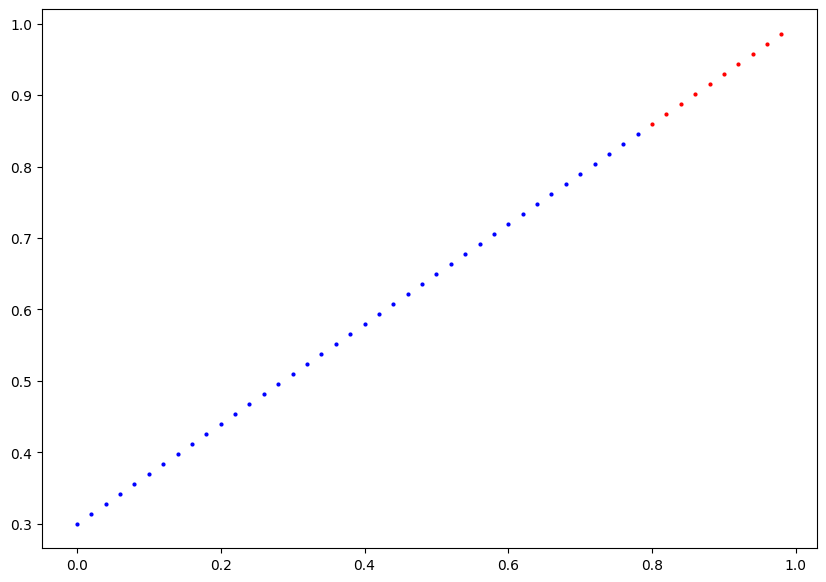

In [199]:
plot_predictions();

#We now Build a Model

In [200]:
#Building our very first model
#We are creatinga linear regression model class as the first step
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                requires_grad=True,
                                dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = torch.float))
    #We use the foward model to define the computation of the model
  def forward(self, X:torch.Tensor) -> torch.Tensor:
    return self.weights * X + self.bias #This is our linear regression formula
#The two algrithim being emplpyed are the gradient Descent and BackPropagation

In [201]:
#Let us check the contents of our PyTorch Model. We use .parameters()
#1: We create a random seed
torch.manual_seed(42)
#2: We create an instance of the model, which is subclass of the nn.Module
model_0 = LinearRegressionModel()
print(model_0)
print(list(model_0.parameters()))
print(model_0.state_dict())


LinearRegressionModel()
[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


#We now Make predictions using the model
  #We use torch.inference_mode()
    #We will first use the X_test and y_test, and then when passing the data through the model, we use the forward() mode
    

In [202]:
#1Make predictions with the model
with torch.inference_mode():
  y_preds = model_0(X_test)


print(y_preds)


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


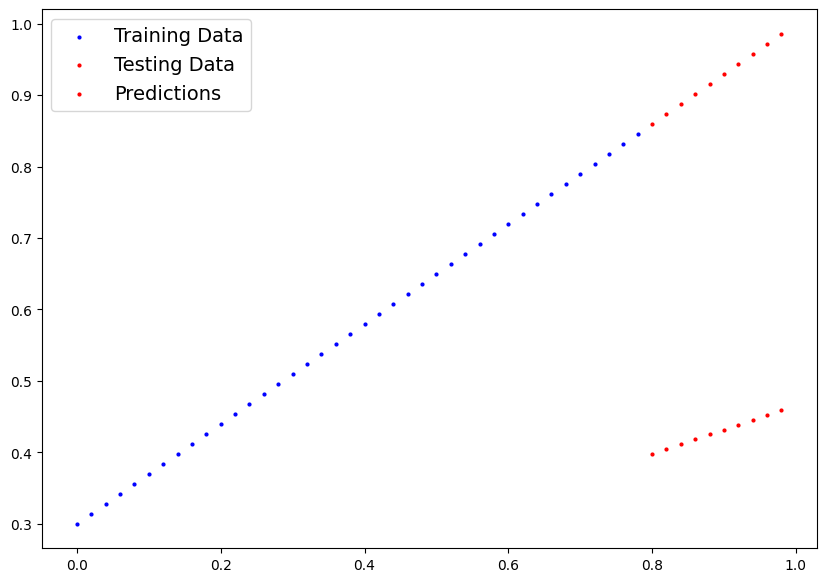

In [203]:
plot_predictions(predictions = y_preds)

#That was awesome

#torch.nn - contains the essential computational graphs
#torch.nn.Parameter - Contains the parameers that our model should learn and try
#torch.Modeule - This is the base class for all neural network modules
#torch.optim - contains python optimizers, which help in gradient descent.
#def forward() -  Defines what happens in the forward computation


In [204]:
#The whole idea of model training is to move from random unknown parameres to known parameters
#However, one of the ways to evaluate how wrong the model is in its preedictions is by usinga  loss function. It is also reffered to cost or criterion function in some areas
#*An Optimizer* takes into account the loss funtion and then makes the required adjustments on the model parameters

In [205]:
print(list(model_0.parameters()))
print(model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [206]:
# We set up the loss funtion
loss_fn = nn.L1Loss()
# We then set up an optimizer (Stochastic gradient Descent. Since we are using Gradient Descent)
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)
#We then build a training loop and testing loop
#-- Testing loop; we will need to;
    #1. Loop through the training data
      #--We use epoch -an epoch is a loop through the data
#This is an empty list for storing useful values-for tracking purposes
epochs = 200
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  #We then set the model to training mode
  model_0.train()
  #2. Forward pass/forward propagation-which involves passing our data through the model's forward function to make predictions
  y_pred = model_0(X_train)
  #3. Calculating the loss (compare forward pass prediction to ground truth labels)
  loss = loss_fn(y_pred, y_train) # so this is a fn of y_train
   #4. Optimizer step - use the optimizer to adjust the parameters of the network and then try to improve the network
  optimizer.zero_grad() #Herer we zero the optimizer grad
  #5. Loss backwords - move backwords through the network to calculate the grad of each parameter of the model with respect to the loss function
  loss.backward()
  #6. Step the optimizer (Perform gradient descent)
  optimizer.step()
  #To turn off grad;
  model_0.eval() #This turns off settings that are needed for evaluation oor testing of the model
  #NOW LET US DO THE TESTING

  with torch.inference_mode():
  # 1. Do the forward pass
    test_pred = model_0(X_test)
  # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)


  if epoch % 10 ==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch}| Loss: {loss}| Test Loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0| Loss: 0.31288138031959534| Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10| Loss: 0.1976713240146637| Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20| Loss: 0.08908725529909134| Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30| Loss: 0.053148526698350906| Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40| Loss: 0.04543796554207802| Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50| Loss: 0.04167863354086876| Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60| Loss: 0.03818932920694351| Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
Epoch: 7

In [207]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

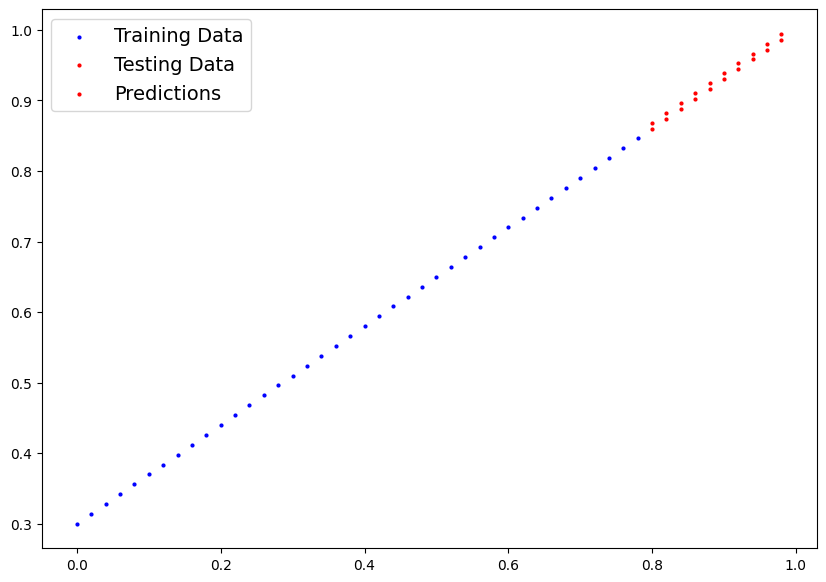

In [208]:
with torch.inference_mode(): #This turns off gradient tracking, and some unnecessary settings too
  y_pred_new = model_0(X_test)

plot_predictions(predictions=y_pred_new)

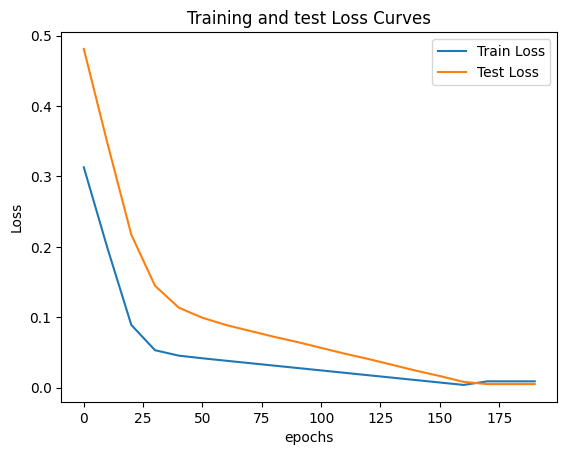

In [209]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train Loss")
plt.plot(epoch_count, test_loss_values, label = "Test Loss")
plt.title("Training and test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend();

#Now let us save our model

In [210]:
#We can use three methods, namly;
"""torch.save() #- saving in python picke
torch.load() #- loading a saved pytorch object
torch.nn.Module.load_state_dict() #loads a model saved in a state dictionary"""



'torch.save() #- saving in python picke\ntorch.load() #- loading a saved pytorch object \ntorch.nn.Module.load_state_dict() #loads a model saved in a state dictionary'

In [219]:
#The recommended mode of saving is ;
from pathlib import Path
#1 Create a model directory
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)
#Create a model save path
MODEL_NAME = "pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
print(MODEL_SAVE_PATH)



Models/pytorch_workflow_model_0.pth


In [220]:
#Now let us save

torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

#That was Pretty awesome. End.